# Step 1. Kaggle dataset setup

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download mkechinov/ecommerce-purchase-history-from-electronics-store

ecommerce-purchase-history-from-electronics-store.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip ecommerce-purchase-history-from-electronics-store.zip

Archive:  ecommerce-purchase-history-from-electronics-store.zip
replace kz.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Step 2. Clean up dataset

Імпортування необхідних бібліотек та налаштування зовнішнього вигляду графіку

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

import sklearn
from sklearn.decomposition import TruncatedSVD

Створення датафрейму з csv файлу

In [21]:
ds = pd.read_csv('kz.csv')

In [22]:
ds.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


Створюємо датасет із додатковою колонкою, яка матиме кількість куплених товарів у одному замовленні

In [40]:
ds_amount = ds.groupby(['order_id', 'product_id', 'category_code', 'brand', 'user_id'])['order_id'].count().reset_index(name='amount')
ds_most_popular = ds.groupby(['product_id'])['product_id'].count().reset_index(name='amount')

<AxesSubplot: xlabel='product_id'>

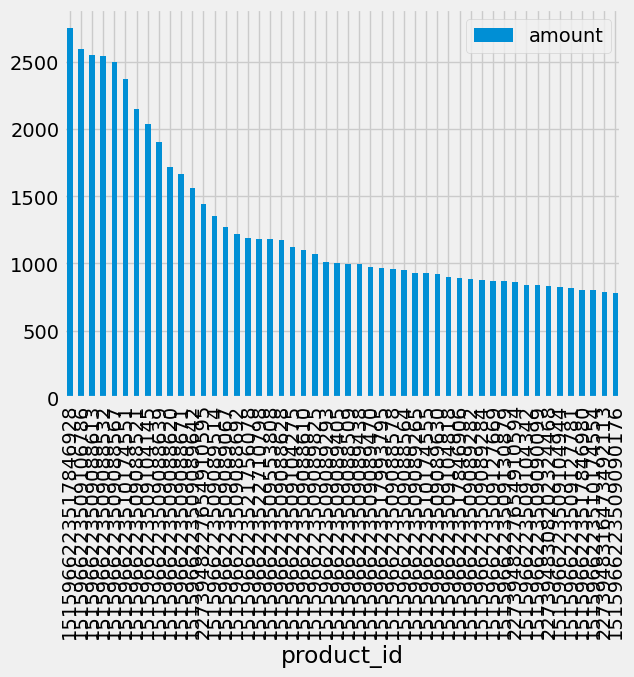

In [55]:
popular = pd.DataFrame(ds_amount.groupby('product_id')['amount'].count())
popular.sort_values('amount', ascending=False).head(50).plot(kind = "bar")

In [ ]:
orders_stats = data_set_count.groupby('product_id').agg(
    orders=('order_id', 'nunique'),
    quantity=('count', 'sum')
).sort_values(by='orders', ascending=False)

In [ ]:
items_matrix = data_set_count.pivot_table(index='order_id', columns=['product_id'], values='count').fillna(0)

In [ ]:
def get_recommendations(df, item):
    recommendations = df.corrwith(df[item])
    recommendations.dropna(inplace=True)
    recommendations = pd.DataFrame(recommendations, columns=['correlation']).reset_index()
    recommendations = recommendations.sort_values(by='correlation', ascending=False)
    
    return recommendations

In [ ]:
recommendations = get_recommendations(items_matrix, 1515966223509089660)
recommendations.head()

,product_id,correlation
357,1515966223509089660,1.000000
10498,2309018261850685947,0.353519
2246,1515966223509128959,0.288625
649,1515966223509090252,0.249973
4747,1515966223509386682,0.249973


In [ ]:
recommendations = get_recommendations(items_matrix, 2273948308663698152)
recommendations.head()

,product_id,correlation
9731,2273948308663698152,1.000000
4280,1515966223509340467,0.141335
8324,2273948222302978377,0.115352
1899,1515966223509122944,0.099857
8629,2273948227730408200,0.081466
